In [925]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as snsplt
os.environ['PROJ_LIB'] = '/anaconda3/pkgs/proj4/share/proj'
from mpl_toolkits.basemap import Basemap

import matplotlib.cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

from collections import Counter
import os.path

In [111]:
os.getcwd()

'/Users/poojatyagi/Dropbox (MIT)/CS109_project_data'

In [938]:
# f='/Users/poojatyagi/Dropbox (MIT)/CS109_project_data/Arizona_District_all.csv'
# df=pd.DataFrame(pd.read_csv(f))
# df.iloc[24,3:len(df):2]

In [987]:
#index of data in CSV
medage_csv=16
unemprate_csv=96
medhhincome_csv=198
bachdeg_csv=240
totpop_csv = 19
black_csv = 22
asian_csv = 24
hispanic_csv = 29

In [988]:
medianage=[]
unemprate=[]
medianhhincome=[]
bachdegree=[]
blackpop=[]
asianpop=[]
hispanicpop=[]
totalpop=[]
filename=[]
num_districts=[]
statename=[]

for f in os.listdir('/Users/poojatyagi/Dropbox (MIT)/CS109_project_data/'):
    if f.endswith('.csv'):
        df=pd.DataFrame(pd.read_csv(f))
        a1=np.transpose(df.iloc[medage_csv,3:len(df):2]) #Median age data from csv
        a2=np.transpose(df.iloc[unemprate_csv,3:len(df):2])  #Unemployment rate data from csv
        a3=np.transpose(df.iloc[medhhincome_csv,3:len(df):2])  #Median household income data from csv
        a4=np.transpose(df.iloc[bachdeg_csv,3:len(df):2])  # bachelors degree or higher (percent) data from csv
        a5=np.transpose(df.iloc[black_csv,3:len(df):2]) #Black population
        a6=np.transpose(df.iloc[asian_csv,3:len(df):2]) #Asian population
        a7=np.transpose(df.iloc[hispanic_csv,3:len(df):2]) #Hispanic population
        totpop=np.transpose(df.iloc[totpop_csv,3:len(df):2]) #Total population
        
        #Index should be in the form statename_district#
        sname=f.partition('_District')[0].replace("_"," ")
        a1.index=[sname+'_'+a1.index[i].split()[1] for i in range(len(a1))]
        a2.index=[sname+'_'+a2.index[i].split()[1] for i in range(len(a2))]
        a3.index=[sname+'_'+a3.index[i].split()[1] for i in range(len(a3))]
        a4.index=[sname+'_'+a4.index[i].split()[1] for i in range(len(a4))]
        a5.index=[sname+'_'+a5.index[i].split()[1] for i in range(len(a5))]
        a6.index=[sname+'_'+a6.index[i].split()[1] for i in range(len(a6))]
        a7.index=[sname+'_'+a7.index[i].split()[1] for i in range(len(a7))]
        totpop.index=[sname+'_'+totpop.index[i].split()[1] for i in range(len(totpop))]
        
        #Create a list of district level data
        medianage.append(a1)
        unemprate.append(a2)
        medianhhincome.append(a3)
        bachdegree.append(a4)
        blackpop.append(a5)
        asianpop.append(a6)
        hispanicpop.append(a7)
        totalpop.append(totpop)  
        filename.append(f)
        num_districts.append(len(a1))
        statename.append(sname)

In [989]:
assert len(unemprate)==len(medianage) == len(medianhhincome) == len(bachdegree)

In [990]:
med_age_df=pd.DataFrame(medianage[0])
unemp_rate_df=pd.DataFrame(unemprate[0])
med_hh_income_df=pd.DataFrame(medianhhincome[0])
bach_degree_df=pd.DataFrame(bachdegree[0])
blackpop_df= pd.DataFrame(blackpop[0])
asianpop_df= pd.DataFrame(asianpop[0])
hispanicpop_df= pd.DataFrame(hispanicpop[0])
totpop_df= pd.DataFrame(totalpop[0])
                        
for i in range(1,len(medianage)):
    med_age_df=pd.concat([med_age_df, pd.DataFrame(medianage[i])],axis=0)
    unemp_rate_df=pd.concat([unemp_rate_df, pd.DataFrame(unemprate[i])],axis=0)
    med_hh_income_df=pd.concat([med_hh_income_df, pd.DataFrame(medianhhincome[i])],axis=0)
    bach_degree_df=pd.concat([bach_degree_df, pd.DataFrame(bachdegree[i])],axis=0)
    blackpop_df=pd.concat([blackpop_df, pd.DataFrame(blackpop[i])],axis=0)
    asianpop_df=pd.concat([asianpop_df, pd.DataFrame(asianpop[i])],axis=0)
    hispanicpop_df=pd.concat([hispanicpop_df, pd.DataFrame(hispanicpop[i])],axis=0)
    totpop_df=pd.concat([totpop_df, pd.DataFrame(totalpop[i])],axis=0)
    

In [846]:
print("Total number of districts is: {}".format(np.sum(num_districts)))

Total number of districts is: 435


In [992]:
new_state_list=[]

for i in range(len(statename)):
    new_state_list.append([str(statename[i])]*len(medianage[i]))

new_state_list_df=pd.DataFrame(new_state_list[0])

for i in range(1,len(new_state_list)):
    new_state_list_df=pd.concat([new_state_list_df, pd.DataFrame(new_state_list[i])],axis=0)

In [993]:
df_list=[unemp_rate_df,med_hh_income_df,bach_degree_df, blackpop_df,asianpop_df,hispanicpop_df,totpop_df]
df_new= med_age_df
for i in df_list:
    df_new=pd.merge(df_new,i, how='left', left_index=True, right_index=True)

df_new.columns=['Median_Age','Unemployment_Rate','Median_HH_Income','Percent_BachDegree',
'Black','Asian','Hispanic','TotalPop']

In [994]:
df_new.shape

(435, 8)

In [995]:
df_new=df_new.astype(float)

In [1008]:
df_data=df_new.copy()
df_data=df_data.astype(float)

In [1009]:
df_data['Black']=df_new['Black']/df_new['TotalPop']*100
df_data['Asian']=df_new['Asian']/df_new['TotalPop']*100
df_data['Hispanic']=df_new['Hispanic']/df_new['TotalPop']*100
df_data['Median_HH_Income']=df_new['Median_HH_Income']/1000
df_data=df_data.drop(['TotalPop'], axis=1)

In [1010]:
df_data['Label']=df_data.index
df_data=df_data.reset_index(drop=True)

In [1011]:
new_state_list_df=new_state_list_df.reset_index(drop=True)
new_state_list_df.columns = ['StateName']
df_data=pd.concat([df_data,new_state_list_df],axis=1)

In [795]:
# print("# of districts \t State")
# print("----------------|-----------")
# for i in range(len(num_districts)):
#     print(num_districts[i], "\t\t|", statename[i])

In [1012]:
state_abbs = pd.read_csv("/Users/poojatyagi/Dropbox (MIT)/CS109_project_data/Usefuldata/state_abbreviations_correspondence_table.csv"
                         , sep = "\t")

In [1013]:
StateAbb=[None] * len(df_data)
for j in range(len(df_data)):
    for i in range(len(state_abbs)):
        if (df_data['StateName'][j]==  state_abbs.iloc[i,0]):
            StateAbb[j]=state_abbs.iloc[i,1]

df_data['StateAbb'] = StateAbb
df_data=df_data.drop(['Label'], axis=1)

In [1014]:
df_data.head()

,Median_Age,Unemployment_Rate,Median_HH_Income,Percent_BachDegree,Black,Asian,Hispanic,StateName,StateAbb
0,40.0,5.8,47.984,25.0,27.866024,1.502222,3.080417,Alabama,AL
1,38.5,6.2,46.579,23.1,30.735289,1.140735,3.629841,Alabama,AL
2,38.1,5.3,46.484,21.7,26.344710,1.650556,2.880274,Alabama,AL
3,40.7,6.0,43.218,17.9,7.173333,0.563487,6.704806,Alabama,AL
4,39.5,4.7,54.707,31.9,17.981308,1.807815,5.196789,Alabama,AL


In [1003]:
df_grouped=df_data.groupby('StateAbb').mean()

In [1004]:
df_grouped.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object', name='StateAbb')

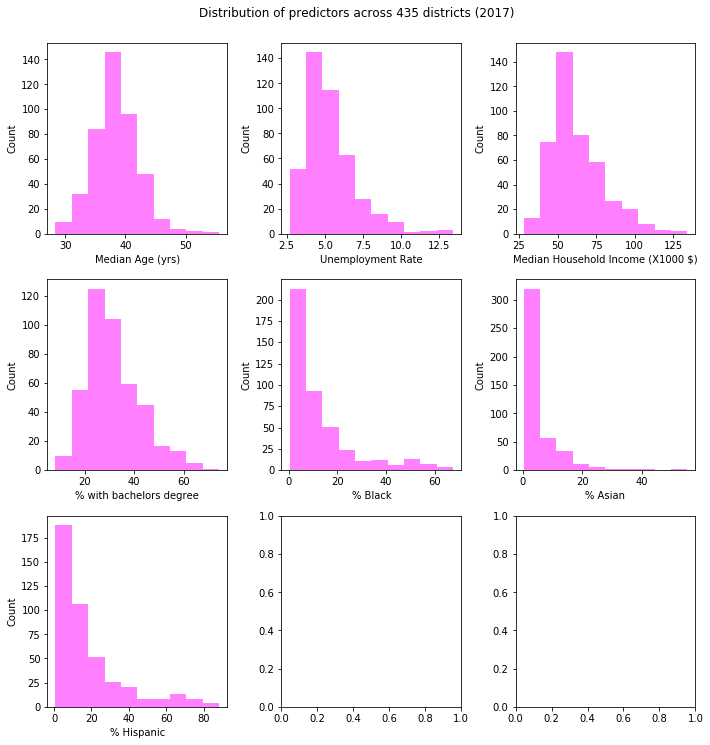

In [1018]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax = ax.flatten()
fig.suptitle('Distribution of predictors across 435 districts (2017)', y=1.03)

labels=['Median Age (yrs)', 'Unemployment Rate', 'Median Household Income (X1000 $)','% with bachelors degree', 
        '% Black', 
       '% Asian', '% Hispanic']

for i in range(7):
    ax[i].hist(df_data.iloc[:,i].dropna(), alpha=0.5, color='magenta')
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel(labels[i])
    
plt.tight_layout()

plt.savefig('sample.pdf', bbox_inches='tight')

In [946]:
# df_grouped.sort_values('Median_Age', inplace=True)
# fig = plt.figure(figsize=(10,7))
# #sns.barplot(x=df_grouped.index, y= df_grouped['Median_Age'])
# df_grouped.plot(y='Median_Age', kind='barh',figsize=(15,10),legend=False, alpha=0.5, colormap='Paired', color='red');

In [945]:
# fig, ax = plt.subplots(figsize=(10,10))
# m = Basemap(resolution='c', # c, l, i, h, f or None
#             projection='merc',
#             #lat_0=54.5, lon_0=50,
#             llcrnrlon=127., llcrnrlat= 23, urcrnrlon=62., urcrnrlat=50)

# # m = Basemap(resolution='c', # c, l, i, h, f or None
# #             projection='merc',
# #             lat_0=54.5, lon_0=-4.36,
# #             llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2)

# m.drawmapboundary(fill_color='#46bcec')
# m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# m.drawcoastlines()

In [1017]:
#m.readshapefile('/Users/poojatyagi/Dropbox (MIT)/CS109_project_data/Usefuldata/ShapeFile/cb_2017_us_state_500k', 'areas')